# Proyek Klasifikasi Gambar: [Input Nama Dataset]
- **Nama:** Laila Wulandari
- **Email:** lailawulandari0811@gmail.com
- **ID Dicoding:** laila_wulandari

## Import Semua Packages/Library yang Digunakan

In [1]:
#Import Library yang Dibutuhkan

#Manipulasi data dan visualisasi
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import shutil
import pathlib
import random
from PIL import Image
import matplotlib.image as mpimg
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

#Preprocessing gambar dan pembuatan model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from concurrent.futures import ThreadPoolExecutor
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model


Insight:

Pada tahap ini dilakukan import library yang dibutuhkan untuk manipulasi data, visualisasi gambar, serta preprocessing dan pembuatan model deep learning menggunakan TensorFlow dan Keras.

## Data Preparation

### Data Loading

In [ ]:
#Mengatur path dataset
dataset_path = 'G:/My Drive/Rice_Image_Dataset'

In [ ]:
#Cek kategori dalam dataset
print("Kategori dalam dataset:")
print(os.listdir(dataset_path))

Kategori dalam dataset:
['Arborio', 'Basmati', 'Ipsala', 'Karacadag', 'Jasmine']


Insight:

Pada tahap ini dilakukan pemuatan dataset dengan membaca daftar kategori/kelas gambar menggunakan os.listdir sebagai langkah awal eksplorasi dataset.

In [ ]:
#Cek Resolusi Gambar dari Beberapa Sampel

#Mengambil semua kategori pada dataset
categories = os.listdir(dataset_path)

#Memeriksa resolusi gambar
def check_image_resolution(dataset_path, categories):
    resolutions = set()  # Set untuk menyimpan resolusi unik
    for category in categories:
        category_path = os.path.join(dataset_path, category)

        #Mengambil 5 gambar pertama dari setiap kategori
        for img_name in os.listdir(category_path)[:5]:
            img_path = os.path.join(category_path, img_name)
            try:
                img = image.load_img(img_path)
                resolutions.add(img.size)
            except Exception as e:
                print(f"Error saat memuat gambar {img_path}: {e}")

    return resolutions

#Cek resolusi gambar dalam dataset
resolutions = check_image_resolution(dataset_path, categories)

#Menampilkan hasil
print("Resolusi yang ditemukan pada gambar-gambar dalam dataset:")
for res in resolutions:
    print(res)


Resolusi yang ditemukan pada gambar-gambar dalam dataset:
(245, 245)
(167, 167)
(208, 208)
(250, 250)
(108, 108)
(86, 86)
(191, 191)
(155, 155)
(68, 68)
(238, 238)
(247, 247)
(105, 105)
(96, 96)
(82, 82)
(229, 229)
(156, 156)
(239, 239)
(143, 143)
(65, 65)
(138, 138)
(235, 235)
(120, 120)
(185, 185)
(88, 88)


Insight:

Guna memastikan konsistensi ukuran gambar, beberapa sampel dicek resolusinya menggunakan image.load_img() dari Keras. Hasilnya yaitu gambar memiliki variasi resolusi yang banyak, hal ini akan memengaruhi kualitas model, maka dari itu akan dilakukan standarisasi.

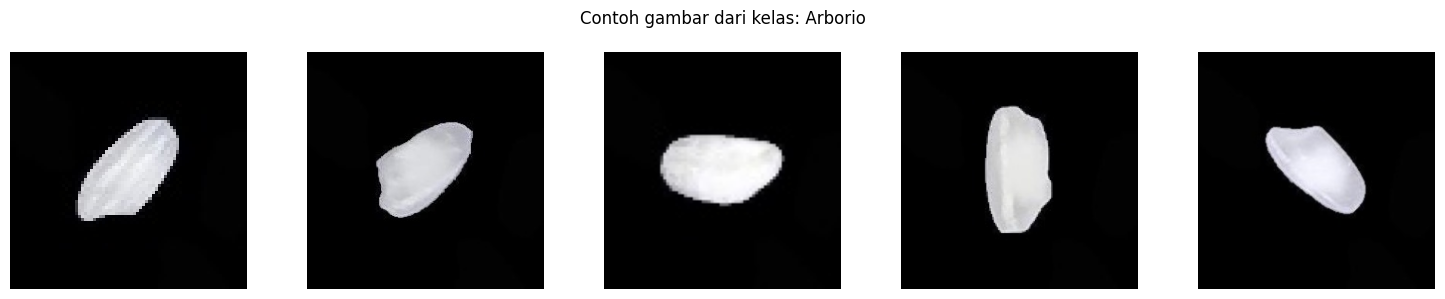

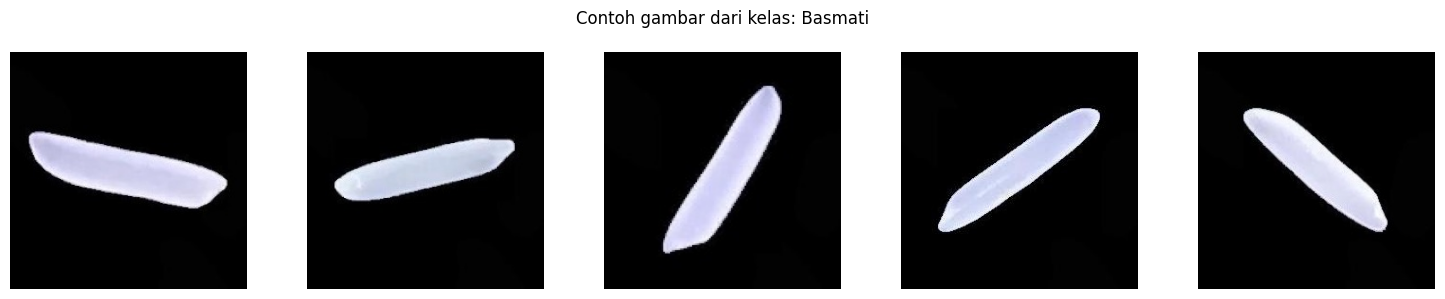

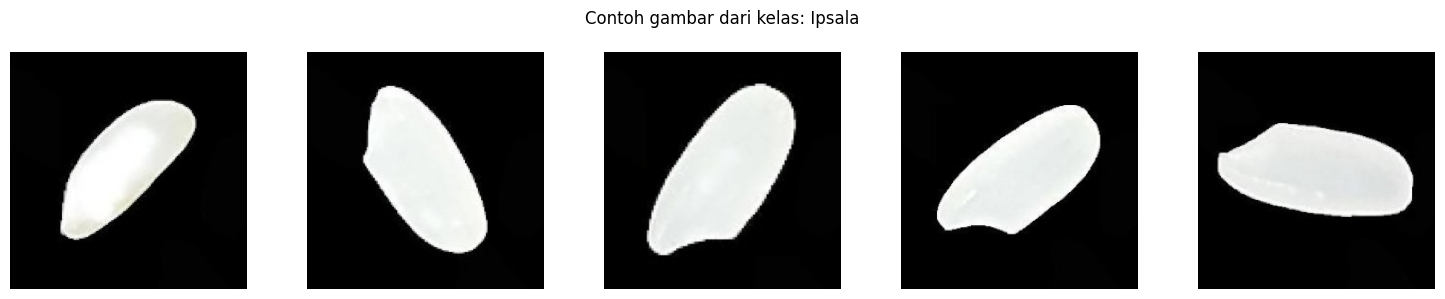

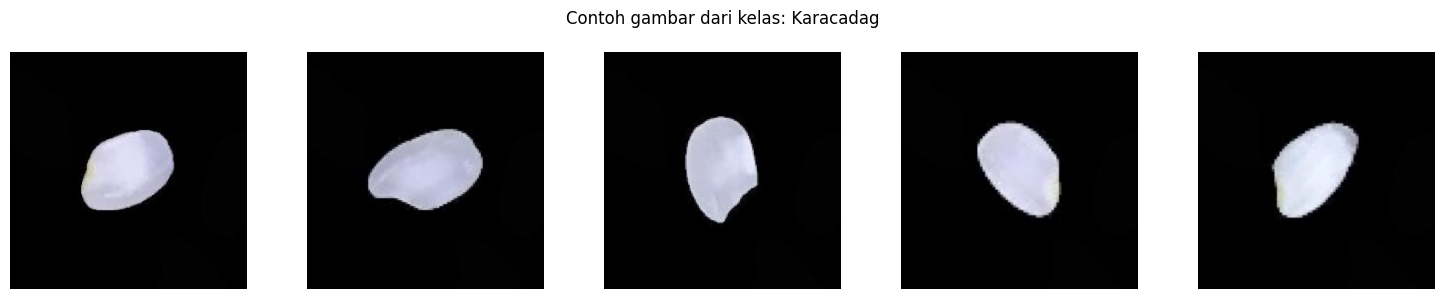

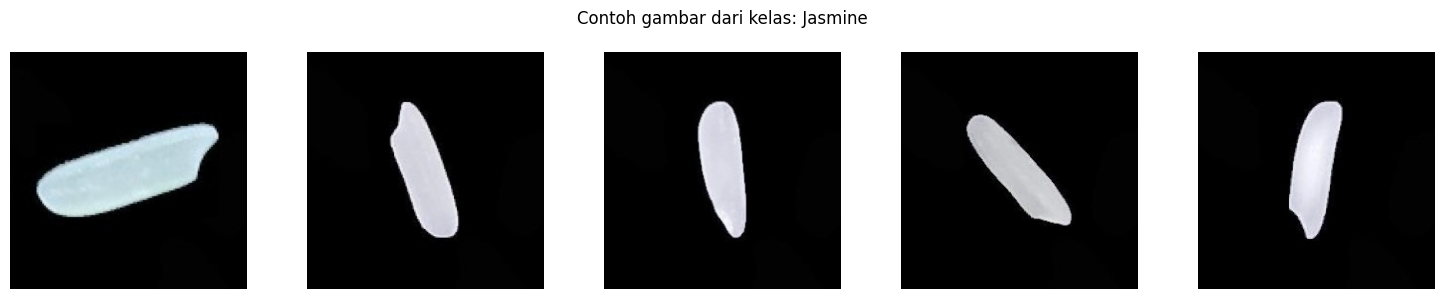

In [ ]:
#Visualisasi Beberapa Gambar dari Tiap Kategori (random sample)

#Path dataset Drive
classes = os.listdir(dataset_path)

#Memilih 5 gambar acak dari tiap kategori
for rice_class in classes:
    class_dir = os.path.join(dataset_path, rice_class)
    image_names = os.listdir(class_dir)
    random_images = random.sample(image_names, k=5) if len(image_names) >= 5 else image_names

    #Load dan tampilkan gambar sesuai dengan nama kategorinya
    fig, axes = plt.subplots(1, len(random_images), figsize=(15, 3))
    fig.suptitle(f'Contoh gambar dari kelas: {rice_class}', fontsize=12)

    for i, img_name in enumerate(random_images):
        img_path = os.path.join(class_dir, img_name)
        img = load_img(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()
    print('\n')


Insight:

Langkah ini bertujuan untuk menampilkan 5 gambar acak dari masing-masing kategori dalam dataset guna mendapatkan gambaran visual awal terhadap data. Hal ini membantu dalam mengamati perbedaan visual antar kelas untuk kategori awal.

### Data Preprocessing

#### Resize Dataset

In [ ]:

#Menetapkan path asli dataset dan path baru untuk data hasil resize
original_path = 'G:/My Drive/Rice_Image_Dataset'
resized_path = 'G:/My Drive/Rice_Image_Resized_128x128'
#Menetapkan ukuran target
target_size = (128, 128)

#Memasitikan folder output ada
os.makedirs(resized_path, exist_ok=True)

#Mengambil semua file yang perlu diproses
tasks = []

for category in os.listdir(original_path):
    category_path = os.path.join(original_path, category)
    new_category_path = os.path.join(resized_path, category)
    os.makedirs(new_category_path, exist_ok=True)

    for img_name in os.listdir(category_path):
        source_img_path = os.path.join(category_path, img_name)
        target_img_path = os.path.join(new_category_path, img_name)

        if not os.path.exists(target_img_path):
            tasks.append((source_img_path, target_img_path))

#Fungsi untuk resize satu gambar
def resize_image(task):
    source_img_path, target_img_path = task
    try:
        img = Image.open(source_img_path)
        img = img.resize(target_size)
        img.save(target_img_path)
        return f"Berhasil resize: {target_img_path}"
    except Exception as e:
        return f"Gagal proses {source_img_path}: {e}"

#Menjalankan resize dengan multithreading
with ThreadPoolExecutor(max_workers=6) as executor:
    results = list(tqdm.tqdm(executor.map(resize_image, tasks), total=len(tasks)))

#Print hasil akhir
for res in results:
    print(res)


100%|██████████| 52091/52091 [1:59:39<00:00,  7.26it/s]  


Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (3645).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (1890).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (8308).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (8456).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (4004).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (6792).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (11016).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (12478).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (6911).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (5461).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (8964).jpg
Berhasil resize: G:/My Drive/Rice_Image_Resized_128x128\Basmati\basmati (1394).jpg
Be

Insight:

Langkah ini bertujuan untuk menyeragamkan resolusi seluruh gambar dalam dataset menjadi 128x128 piksel. Hal ini penting untuk memastikan bahwa input ke model deep learning memiliki ukuran yang konsisten dan optimal untuk pelatihan. Proses bersifat iteratif terhadap semua gambar dalam setiap kategori. Proses resize dilakukan secara multithreading menggunakan ThreadPoolExecutor untuk mempercepat proses dengan menggunakan 6 thread. Selanjutnya hasil kan disimpan ke direktori baru tanpa menimpa file asli dalam folder Rice_Image_Resized_128x128 yang terorganisir sesuai kategori.

#### Split Dataset

In [ ]:
#Membagi dataset hasil resize

#Lokasi dataset hasil resize
base_dir = 'G:/My Drive/Rice_Image_Resized_128x128'

#Lokasi folder output split
output_dir = 'G:/My Drive/Rice_Image_Split'

def copy_file_if_not_exists(src, dst):
    if not os.path.exists(dst):
        shutil.copy(src, dst)

#Membagi menjadi 3 subset, train 70%, validation 15%, dan test 15%
def split_dataset(base_dir, output_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    categories = os.listdir(base_dir)
    #Mengambil seluruh gambar dari setiap kategori, lalu mengacak urutannya
    for category in categories:
        category_path = os.path.join(base_dir, category)
        images = os.listdir(category_path)
        random.shuffle(images)
        #Menghitung jumlah gambar untuk masing-masing subset berdasarkan rasio.
        total = len(images)
        train_count = int(train_ratio * total)
        val_count = int(val_ratio * total)

        train_imgs = images[:train_count]
        val_imgs = images[train_count:train_count + val_count]
        test_imgs = images[train_count + val_count:]
        #Membuat struktur folder train/, val/, dan test/ di dalam output_dir
        for split_name, split_imgs in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
            split_dir = os.path.join(output_dir, split_name, category)
            os.makedirs(split_dir, exist_ok=True)
            #Menyalin gambar ke folder masing-masing subset menggunakan multithreading
            with ThreadPoolExecutor(max_workers=6) as executor:
                for img in split_imgs:
                    src_path = os.path.join(category_path, img)
                    dst_path = os.path.join(split_dir, img)
                    executor.submit(copy_file_if_not_exists, src_path, dst_path)


Insight:

Tahap ini membagi dataset hasil resize ke dalam tiga subset: train (70%), validation (15%), dan test (15%). Pembagian ini penting untuk melatih model secara optimal dan menghindari overfitting. Dikarenakan jumlah data yang banyak, maka menggunakan multithreading dengan 6 thread.

#### Augmentasi dan Normalisasi

In [ ]:
#Training generator dengan augmentasi
train_gen = ImageDataGenerator(
    #Normalisasi piksel
    rescale=1./255,
    #Rotasi 30 derajat
    rotation_range=30,
    #Pergeseran horizontal dan vertikal 30 derajat
    width_shift_range=0.3,
    height_shift_range=0.3,
    #Variasi shear,zoom, dan brightness
    shear_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    #Pergeseran warna channel
    channel_shift_range=30.0,
    #Flip horizontal
    horizontal_flip=True,
    #Piksel kosong akan diisi dengan nilai piksel terdekat
    fill_mode='nearest'
)

#Validation dan testing generator dengan normalisasi piksel menggunakan rescale
val_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)


Insight:

Tahap ini melakukan augmentasi (untuk training) dan normalisasi (untuk semua subset) menggunakan ImageDataGenerator dari Keras. Augmentasi memperkaya variasi data latih untuk meningkatkan generalisasi model. Dengan hasil generator yang siap digunakan untuk memuat data gambar dari folder flow_from_directory().

In [ ]:
#Load Data dengan flow_from_directory

#Ukuran gambar
img_size = (128, 128)
#Jumlah gambar per batch
batch_size = 32
#Path ke direktori dataset untuk tiab subset
train_dir = 'G:/My Drive/Rice_Image_Split/train'
val_dir = 'G:/My Drive/Rice_Image_Split/val'
test_dir = 'G:/My Drive/Rice_Image_Split/test'

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_gen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 52525 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


Insight:

Pada tahap ini, digunakan fungsi flow_from_directory() dari ImageDataGenerator untuk memuat data gambar dari folder yang telah dibagi menjadi train, validation, dan test. Setiap gambar di-resize ke ukuran 128x128 px, dibagi dalam batch sebesar 32, dan diberi label secara otomatis berdasarkan nama folder (kelas).
Hasilnya Train memeiliki 52.525 gambar dari 5 kelas, sedangkan Validation dan Test memiliki 11.250 gambar dari 5 kelas.


## Modelling

In [ ]:
#Arsitektur Model CNN

#Menentukan ukuran input gambar dengan resolusi 128x128 piksel dan 3 channel warna (RGB).
model = Sequential([
    Input(shape=(128, 128, 3)),

    #Block 1
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    #Block 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    #Block 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    #Block 4
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    #Mengubah data multidimensi menjadi vektor 1 dimensi untuk input ke layer Dense
    Flatten(),
    #Layer fully connected dengan 256 neuron untuk menggabungkan fitur yang diekstraksi
    Dense(256, activation='relu'),
    #Meningkatkan generalisasi model dengan mengurangi overfitting.
    Dropout(0.5),
    #Layer output dengan 5 kelas, menggunakan fungsi aktivasi softmax untuk klasifikasi
    Dense(5, activation='softmax')
])


Insight:

Model ini menggunakan fungsi Sequential dengan kombinasi layer konvolusi, normalisasi, dan pooling untuk mengekstraksi fitur gambar secara bertahap. Penambahan layer konvolusi di Block 4 dan dropout pada Dense layer bertujuan untuk meningkatkan generalisasi model serta mengatasi overfitting. Dataset yang diolah terdiri dari train (52.525 gambar, 5 kelas), validation, dan test (masing-masing 11.250 gambar, 5 kelas). Data gambar di-resize ke 128x128 px, dengan batch processing sebesar 32, dan label otomatis berdasarkan nama folder untuk memastikan efisiensi pemrosesan dan klasifikasi yang akurat.

In [ ]:
#Kompilasi model CNN
model.compile(
    #Menggunakan Adam dengan learning rate 0.0001 untuk optimizer modelnya
    optimizer=Adam(learning_rate=0.0001),
    #Menggunakan categorical_crossentropy untuk klasifikasi multi-kelas
    loss='categorical_crossentropy',
    #Mengukur accuracy untuk melacak seberapa baik model mengklasifikasikan data selama pelatihan.
    metrics=['accuracy']
)
#Menampilkan ringkasan arsitektur model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     4,194,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,586,181 (17.49 MB)

 Trainable params: 4,585,221 (17.49 MB)

 Non-trainable params: 960 (3.75 KB)

Insight:


Model dikompilasi menggunakan Adam optimizer dengan learning rate 0.0001, loss function categorical_crossentropy, dan metrik accuracy. Total parameter model adalah 4,586,181, dengan 4,585,221 trainable parameters dan 960 non-trainable parameters. Struktur layer terdiri dari kombinasi convolutional, pooling, dan dense layers yang dirancang untuk klasifikasi gambar ke dalam 5 kelas. Model memiliki ukuran sekitar 17.49 MB, menunjukkan efisiensi untuk pelatihan dan deployment.

## Evaluasi dan Visualisasi

In [ ]:
#Mengimplementasikan Callbacks

callbacks = [
    #Memantau val_loss jika tidak membaik selama 3 epoch berturut-turut,
    #pelatihan akan dihentikan dan secara otomatis memulihkan bobot terbaik model saat val_loss terendah
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    #Menyimpan model terbaik jika val_loss membaik dibandingkan sebelumnya, disimpan dalam format HDF5
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
]


Insight:

Callbacks digunakan untuk meningkatkan efisiensi pelatihan dan mencegah overfitting dengan memantau val_loss. EarlyStopping menghentikan pelatihan jika validasi tidak menunjukkan perbaikan selama 3 epoch, sementara ModelCheckpoint menyimpan model terbaik ke file 'best_model.h5', memastikan model yang dihasilkan optimal untuk digunakan lebih lanjut.

In [ ]:
#Pelatihan Model

history = model.fit(
    #Sumber data untuk pelatihan
    train_generator,
    epochs=20,
    #Validasi performa model dari data terpisah
    validation_data=val_generator,
    #Mengimplementasikan callbacks
    callbacks=callbacks,
)


Epoch 1/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5680 - loss: 1.1978

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 339s 202ms/step - accuracy: 0.5681 - loss: 1.1975 - val_accuracy: 0.9274 - val_loss: 0.2235
Epoch 2/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8842 - loss: 0.3156

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 328s 200ms/step - accuracy: 0.8842 - loss: 0.3155 - val_accuracy: 0.9702 - val_loss: 0.0965
Epoch 3/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 327s 199ms/step - accuracy: 0.9162 - loss: 0.2361 - val_accuracy: 0.8246 - val_loss: 0.8063
Epoch 4/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9395 - loss: 0.1748

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 380s 198ms/step - accuracy: 0.9395 - loss: 0.1748 - val_accuracy: 0.9692 - val_loss: 0.0965
Epoch 5/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 329s 201ms/step - accuracy: 0.9463 - loss: 0.1468 - val_accuracy: 0.8438 - val_loss: 0.9219
Epoch 6/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 340s 207ms/step - accuracy: 0.9504 - loss: 0.1422 - val_accuracy: 0.9625 - val_loss: 0.1788
Epoch 7/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9580 - loss: 0.1196

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 330s 201ms/step - accuracy: 0.9580 - loss: 0.1196 - val_accuracy: 0.9767 - val_loss: 0.0818
Epoch 8/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 328s 200ms/step - accuracy: 0.9603 - loss: 0.1113 - val_accuracy: 0.9573 - val_loss: 0.1917
Epoch 9/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 329s 200ms/step - accuracy: 0.9630 - loss: 0.1072 - val_accuracy: 0.9477 - val_loss: 0.3533
Epoch 10/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9638 - loss: 0.1065

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 326s 198ms/step - accuracy: 0.9638 - loss: 0.1065 - val_accuracy: 0.9860 - val_loss: 0.0521
Epoch 11/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 329s 200ms/step - accuracy: 0.9627 - loss: 0.1057 - val_accuracy: 0.7703 - val_loss: 1.4197
Epoch 12/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9668 - loss: 0.0941

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 325s 198ms/step - accuracy: 0.9668 - loss: 0.0941 - val_accuracy: 0.9945 - val_loss: 0.0162
Epoch 13/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 325s 198ms/step - accuracy: 0.9683 - loss: 0.0935 - val_accuracy: 0.8525 - val_loss: 1.2339
Epoch 14/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 381s 197ms/step - accuracy: 0.9705 - loss: 0.0849 - val_accuracy: 0.9599 - val_loss: 0.2783
Epoch 15/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 327s 199ms/step - accuracy: 0.9725 - loss: 0.0796 - val_accuracy: 0.9621 - val_loss: 0.2288


Insight:

Kode ini melatih model menggunakan generator untuk data training dan validation, dengan total 20 epoch. Akurasi model meningkat dari 0.5680 hingga 0.9725 pada epoch ke 15. Sedangkan loss menurun dari 1.1987 hingga 0.0796 pada epoch ke 15. Model dilatih selama 15 epoch sebelum selesai, dengan akurasi mencapai 97.25%. Kerugian validasi terendah dicapai pada epoch ke-12 (loss: 0.0162, val_accuracy: 0.9945). Pelatihan berhenti lebih awal karena kerugian validasi tidak membaik lagi.

In [ ]:
#Mengevaluasi dan Mencetak Hasil Pelatihan Model

train_acc = history.history['accuracy'][-1]
train_loss = history.history['loss'][-1]
val_acc = history.history['val_accuracy'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Akurasi Training Akhir: {train_acc:.4f}")
print(f"Loss Training Akhir: {train_loss:.4f}")
print(f"Akurasi Validasi Akhir: {val_acc:.4f}")
print(f"Loss Validasi Akhir: {val_loss:.4f}")


Akurasi Training Akhir: 0.9716
Loss Training Akhir: 0.0823
Akurasi Validasi Akhir: 0.9621
Loss Validasi Akhir: 0.2288


Insight:

Model menunjukkan akurasi tinggi pada pelatihan (97.16%) dan validasi (96.21%) dengan nilai kerugian yang cukup rendah. Performa ini mengindikasikan kemampuan model dalam generalisasi terhadap data validasi, meskipun nilai kerugian validasi sedikit lebih tinggi dibandingkan pelatihan.

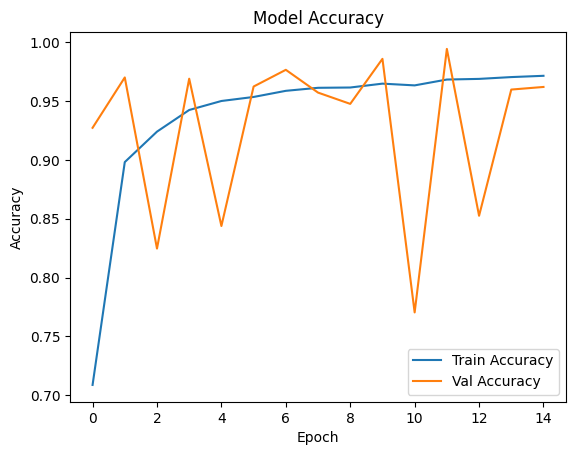

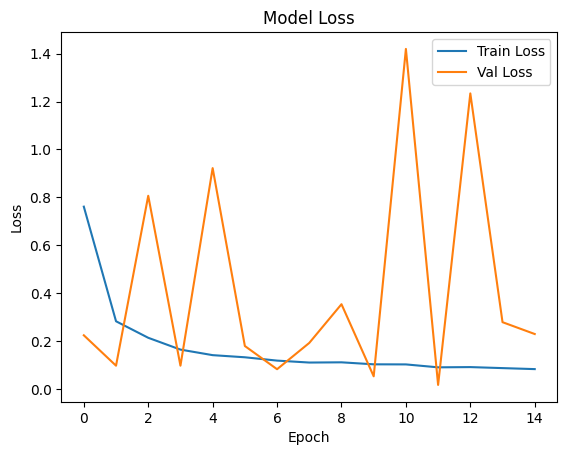

In [ ]:
#Plotting Akurasi Model
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Plotting Loss Model
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Insight:

1. Plot Akurasi


*   Train Accuracy meningkat konsisten setiap epoch, menunjukkan model belajar efektif.
*   Validation Accuracy stabil meski ada fluktuasi kecil, mengindikasikan kemampuan generalisasi yang baik.


2. Plot Loss


*   Train Loss terus menurun, membuktikan prediksi semakin akurat.
*   Validation Loss menunjukkan fluktuasi besar di beberapa epoch, menandakan potensi overfitting atau data validasi yang kurang optimal.

Kesimpulan:

Model belajar dengan baik dan menunjukkan performa solid. Namun, ketidakstabilan pada Validation Loss dapat diatasi dengan penyesuaian hiperparameter atau augmentasi data untuk meningkatkan generalisasi.

In [ ]:
#Evaluasi Performa Model pada Data Uji

#Akurasi dan loss model pada data uji
test_loss, test_acc = model.evaluate(test_generator)
print(f'Akurasi Test: {test_acc:.4f}')
print(f'Loss Test: {test_loss:.4f}')


352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9947 - loss: 0.0161
Akurasi Test: 0.9949
Loss Test: 0.0141


Insight:

Kode ini mengevaluasi performa model pada data uji menggunakan generator yang telah didefinisikan sebelumnya. Model mencapai akurasi uji sebesar 99.49% dengan loss uji hanya 0.0141, yang membuktikan bahwa model mampu menangani data baru dengan tingkat presisi tinggi. Hasil ini mengindikasikan efektivitas generalisasi model terhadap data yang belum pernah dilihat sebelumnya.

352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step


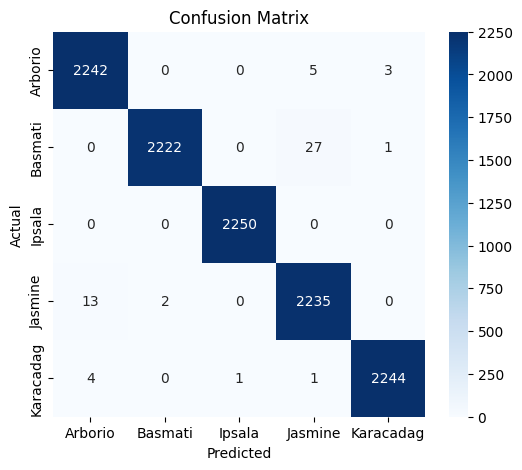

Classification Report:
              precision    recall  f1-score   support

     Arborio       0.99      1.00      0.99      2250
     Basmati       1.00      0.99      0.99      2250
      Ipsala       1.00      1.00      1.00      2250
     Jasmine       0.99      0.99      0.99      2250
   Karacadag       1.00      1.00      1.00      2250

    accuracy                           0.99     11250
   macro avg       0.99      0.99      0.99     11250
weighted avg       0.99      0.99      0.99     11250



In [ ]:
#Confussion Matrix dan Classification Report

#Prediksi untuk tiap kelas
y_pred = model.predict(test_generator)
#Mengambil indeks kelas dengan probabilitas tertinggi sebagai hasil prediksi
y_pred_classes = np.argmax(y_pred, axis=1)
#Mengambil label sebenarnya dari data uji
y_true = test_generator.classes

#Label nama kelas
class_labels = list(test_generator.class_indices.keys())

#Confusion Matrix
#Membandingkan label sebenarnya dan prediksi untuk menghasilkan matriks kesalahan klasifikasi
cm = confusion_matrix(y_true, y_pred_classes)
#Heatmap confussion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Classification Report
#Memberikan detail metrik evaluasi, termasuk precision, recall, dan f1-score untuk masing-masing kelas
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


## Konversi Model

In [ ]:
#Load model hasil training dari file berformat HDF5
model = load_model("best_model.h5")


In [ ]:
#Menyimpan model ke dalam format SavedModel
tf.saved_model.save(model, "submission/saved_model/")


In [ ]:
#Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("submission/saved_model/")
tflite_model = converter.convert()

#Menyimpan hasil konversi ke dalam folder tflite
with open("submission/tflite/model.tflite", "wb") as f:
    f.write(tflite_model)


## Inference (Optional)

Saving inference 2.jpg to inference 2.jpg
Saving inference.jpg to inference (1).jpg


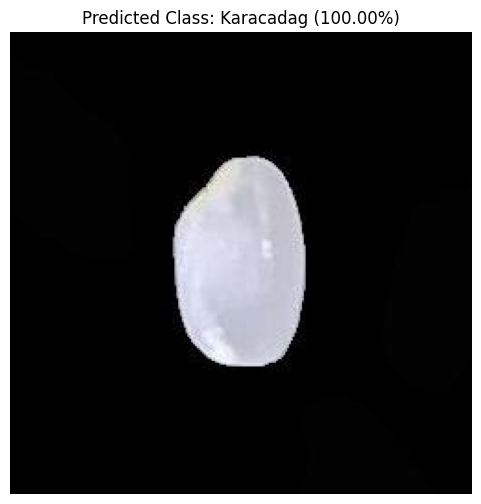

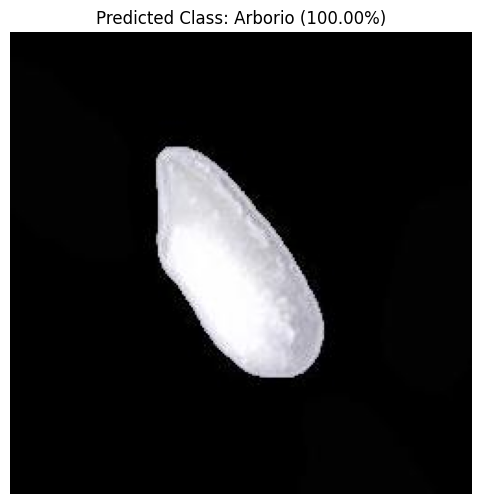

In [11]:
#Memuat model yang sudah disimpan dalam format SavedModel
model = tf.saved_model.load("submission/saved_model/")

#Upload beberapa gambar beras
uploaded = files.upload()

#Proses setiap gambar yang di-upload
for fn in uploaded.keys():
    #Load gambar dengan target size sesuai input model (128x128)
    test_img = image.load_img(fn, target_size=(128, 128))

    #Preprocessing gambar
    pp_test_img = image.img_to_array(test_img)
    #Normalisasi gambar
    pp_test_img = pp_test_img / 255.0
    #Tambah dimensi batch
    pp_test_img = np.expand_dims(pp_test_img, axis=0)

    #Inferensi menggunakan model SavedModel
    #Default signature untuk SavedModel
    infer = model.signatures['serving_default']
    #Akses output prediksi
    test_preds = infer(tf.constant(pp_test_img))['output_0']

    #Menampilkan hasil prediksi untuk setiap gambar
    plt.figure(figsize=(6, 6))
    plt.axis('off')

    #Prediksi kelas berdasarkan probabilitas
    predicted_class = np.argmax(test_preds.numpy(), axis=1)
    class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
    predicted_label = class_labels[predicted_class[0]]

    #Menampilkan hasil
    plt.title(f"Predicted Class: {predicted_label} ({test_preds.numpy()[0][predicted_class[0]]*100:.2f}%)")
    #Menampilkan gambar asli yang di-upload
    plt.imshow(image.load_img(fn))
    plt.show()


Insight:

Kode ini merupakan proses inferensi menggunakan model yang telah disimpan di saved_model dengan menggunakan signature default. Inferensi dilakukan pada 2 gambar dengan kelas yang berbeda. Hasilnya menunjukkan bahwa keduanya memiliki tingkat akurasi 100%. Ini menunjukkan bahwa model bekerja secara efektif salam mengklasifikasi gambar berdasarkan input yang diberikan.